# Convolutional Neural Networks (**CNN**)

### Reference: [CNN-Playlist](https://www.youtube.com/watch?v=HV9cB6UKLIs&list=PLAHmHkSA6KkX7yrpL1GA-joyog9Z16N6V)

### About Convolution: [Convolution Process](https://setosa.io/ev/image-kernels/)

This is my first project using **CNN**. In this project I'm using *cifar10* dataset.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

In [ ]:
# Display the Tensor Flow version
tf.__version__

'2.15.0'

# Looking to the image base

The base is composed by $32$x$32$ **RGB** images.

The Train dataset has $50000$ images and the Test dataset has $10000$. Therefore, the dataset is divided into $83.33\%$ train and $16.67\%$ test.

In [26]:
print(X_Train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


# The dataset has 10 different classes

In [3]:
classes = [
    'Airplane',
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck'
]

# Normalizing the values of images (scale to $[0,\,1]$)

In [4]:
X_Train = X_Train/ 255.0
X_test = X_test/ 255.0

# **Creating the Neural Network**

## **Activations**
### **ReLU** (Rectified Linear Unit)

$$f(x) = x^{+} = max(0, x) = \dfrac{x - |x|}{2} = \begin{cases}x, x \gt 0\\0, x \le 0\end{cases}$$

where $x$ is the input to a neuron.

## **Softmax**

let $\sigma: \mathbb{R}^K → (0,\,1)^K$, where $K \ge 1$, takes a **vector** $\vec{z} = (z_1, z_2, …, z_K) ∈ \mathbb{R}^K$ and computes each component of vector $\sigma(z) \in (0,\,1)^K$ with  

$$\sigma(z)_i = \dfrac{e^{z_i}}{∑_{j=1}^{K}e^{z_j}}$$  

The softmax function takes as input a vector $z$ of $K$ real numbers, and normalizes it into a **probability distribution** consisting of $K$ probabilities proportional to the exponentials of the input numbers
So, the return will be a vector of probabilities.

## **Convolution Neural Network Architecture with *Adam* Optimizer**

**. Convolutional Layer (Conv2D):** Kernel=5x5; activation='ReLU'  
**. Pooling Layer (MaxPool2D):** pool_size=2x2; strides = 2  
**. Convolutional Layer (Conv2D):** Kernel=5x5, activation = 'ReLU'  
**. Pooling Layer (MaxPool2D):** pool_size=2x2, strides = 2  
**. Flattening Layer**  
**. Dense Layer:** units=1024, activation='ReLU'  
**. Dense Layer:** units=10, activation='softmax'

The activation function of the last **Dense Layer** is the *Softmax* activation function, so the output of the **CNN** will be a vector of probabilities of the input belonging to each of the 10 classes.

In [45]:
def create_model():
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=[32, 32, 3]))

  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
  # model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=[32, 32, 3]))

  # model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [54]:
model = create_model()

## Summary

In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 average_pooling2d_6 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)             

In [56]:
# After compile, we can train the model
model.fit(X_Train, y_train, epochs=10) # epochs = number of iterations

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.2002 - accuracy: 0.2810
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4056 - accuracy: 0.5024
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1972 - accuracy: 0.5835
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0430 - accuracy: 0.6374
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8774 - accuracy: 0.6993
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7063 - accuracy: 0.7580
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5692 - accuracy: 0.8102
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4681 - accuracy: 0.8492
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3906 - accuracy: 0.8774
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.353

## Testing

In [57]:
answer = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


# Checking the metrics

In [58]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\t[+] Accuracy:\t{accuracy}\n\t[+] Loss:\t{loss}')

313/313 [==============================] - 1s 3ms/step - loss: 2.5513 - accuracy: 0.5628
	[+] Accuracy:	0.5627999901771545
	[+] Loss:	2.55128812789917


# Visualizing the *Feature Maps* of the first convolution layer

Which *features* the model learn to recognise each class... 'Cause the images has small dimensions, the images don't look good.

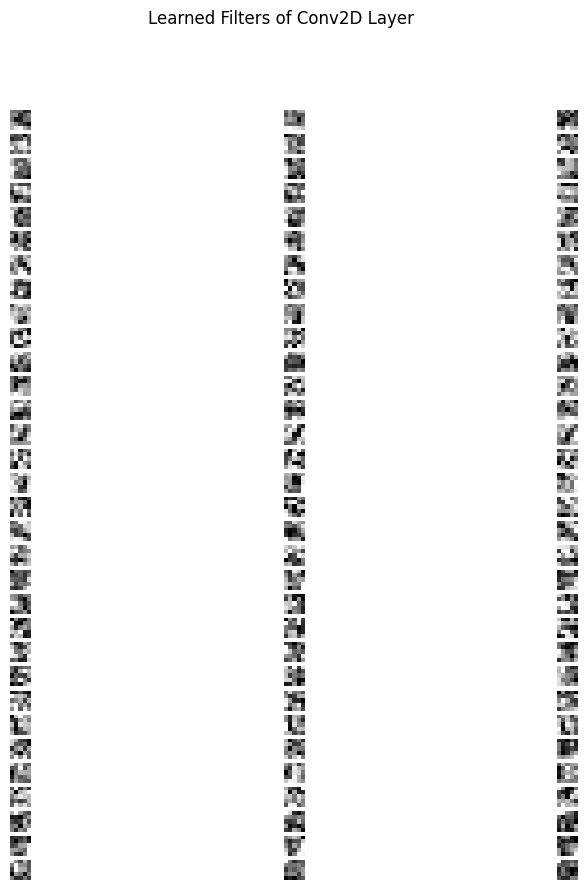

In [59]:
# Assume 'conv2d_layer' is the name or index of the convolutional layer you want to visualize
# conv2d_layer = model.get_layer('conv2d_layer')  # Replace with your layer name or index

conv_layer = model.layers[0]  # Assuming the first layer is the convolutional layer

# Get the weights (filters) of the convolutional layer
filters, biases = conv_layer.get_weights()

# Normalize filters for visualization (optional but recommended)
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plotting the filters
n_filters = filters.shape[3]  # Number of filters in the layer
plt.figure(figsize=(10, 10))
for i in range(n_filters):
    filt = filters[:, :, :, i]
    # Plot each channel of the filter
    for j in range(filt.shape[2]):
        plt.subplot(n_filters, filt.shape[2], i * filt.shape[2] + j + 1)
        plt.imshow(filt[:, :, j], cmap='gray')
        plt.axis('off')
plt.suptitle('Learned Filters of Conv2D Layer')
plt.show()

## **Testing a specific image**

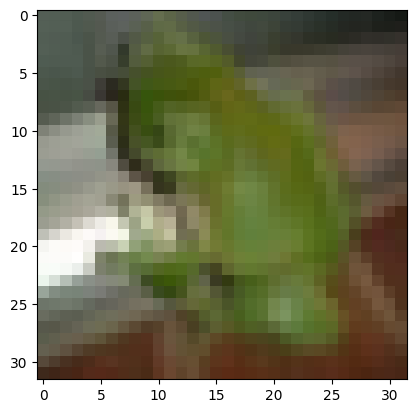

In [72]:
image = X_test[7]
plt.imshow(image)

# **Reshape the image to a 4D tensor vector**

In [73]:
image = image.reshape(1, 32, 32, 3)

# **Output of our model**

As the model output passes through the *softmax* activation function, we must find the highest probability of the network output to know what the output class is.

In [74]:
prob_array = model.predict(image)
guess = np.argmax(prob_array)
print(f'Guess: {classes[guess]}')

1/1 [==============================] - 0s 19ms/step
Guess: Frog
